In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [2]:
df = pd.read_excel("HousePricePrediction.xlsx")
df.head()


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
drp_clm = ['Id', 'BsmtFinSF2']
df1 = df.drop(columns=drp_clm)
df1.head()


,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,1145.0,250000.0


In [4]:
df1.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [5]:
df2 = df1.dropna()
df2.tail()


,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,1542.0,210000.0
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,1152.0,266500.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1078.0,142125.0
1459,20,RL,9937,Inside,1Fam,6,1965,1965,HdBoard,1256.0,147500.0


In [6]:
df2.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [7]:
df2.describe()


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,5.575342,1971.267808,1984.865753,1057.429452,180921.195890
std,42.300571,9981.264932,1.112799,30.202904,20.645407,438.705324,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,34900.000000
25%,20.000000,7553.500000,5.000000,1954.000000,1967.000000,795.750000,129975.000000
50%,50.000000,9478.500000,5.000000,1973.000000,1994.000000,991.500000,163000.000000
75%,70.000000,11601.500000,6.000000,2000.000000,2004.000000,1298.250000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,6110.000000,755000.000000


In [8]:
df2.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [9]:
df2.dtypes


MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [10]:

correlational_col = ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'SalePrice']
correlational_matrix = df2[correlational_col].corr().abs()


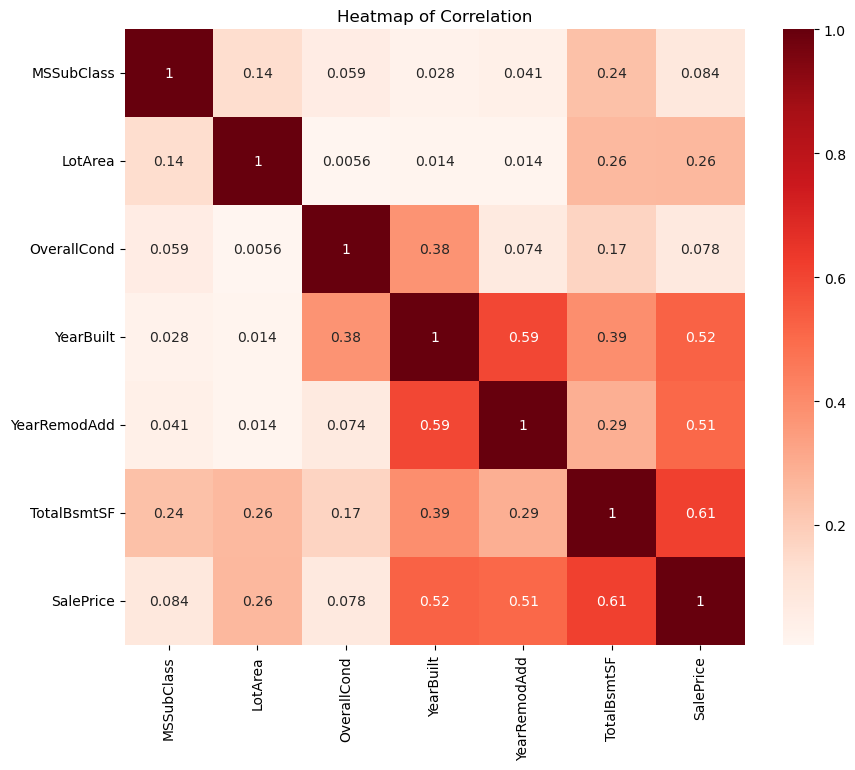

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlational_matrix, annot=True, cmap='Reds')
plt.title("Heatmap of Correlation")
plt.show()


In [12]:
plt.figure(figsize=(25, 25))


<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

In [13]:
# Filter columns with integer and float data types
numeric_columns = df2.select_dtypes(include=['int', 'float']).columns


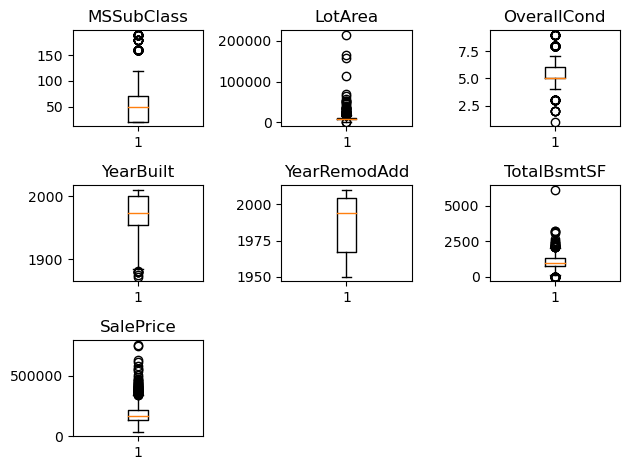

In [14]:
# Iterate over each numeric column
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(df2[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [15]:
first_quartile = df2.quantile(0.25)
third_quartile = df2.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = third_quartile - first_quartile

# Set a threshold for identifying outliers (e.g., Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)
outlier_threshold = 1.5

# Identify outliers
outliers = ((df2 < (first_quartile - outlier_threshold * IQR)) | (df2 > (third_quartile + outlier_threshold * IQR)))
# Calculate the number of outliers for each column
num_outliers = outliers.sum()

# Print the number of outliers for each column
print("Number of outliers for each column:")
print(num_outliers)


Number of outliers for each column:
BldgType          0
Exterior1st       0
LotArea          69
LotConfig         0
MSSubClass      103
MSZoning          0
OverallCond     125
SalePrice        61
TotalBsmtSF      61
YearBuilt         7
YearRemodAdd      0
dtype: int64


C:\Users\zz\AppData\Local\Temp\ipykernel_7572\634859948.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  first_quartile = df2.quantile(0.25)
C:\Users\zz\AppData\Local\Temp\ipykernel_7572\634859948.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  third_quartile = df2.quantile(0.75)
C:\Users\zz\AppData\Local\Temp\ipykernel_7572\634859948.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df2 < (first_quartile - outlier_threshold * IQR)) | (df2 > (thi

In [16]:
df2 = df2[~outliers.any(axis=1)]
df2

categorical_columns = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


In [17]:
# Perform one-hot encoding
df3 = pd.get_dummies(df2, columns=categorical_columns)
# Print the encoded data
print(df3)


      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  TotalBsmtSF  \
0             60     8450            5       2003          2003        856.0   
2             60    11250            5       2001          2002        920.0   
3             70     9550            5       1915          1970        756.0   
4             60    14260            5       2000          2000       1145.0   
5             50    14115            5       1993          1995        796.0   
...          ...      ...          ...        ...           ...          ...   
1454          20     7500            5       2004          2005       1221.0   
1455          60     7917            5       1999          2000        953.0   
1456          20    13175            6       1978          1988       1542.0   
1458          20     9717            6       1950          1996       1078.0   
1459          20     9937            6       1965          1965       1256.0   

      SalePrice  MSZoning_C (all)  MSZo

In [18]:
df3.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,856.0,208500.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,60,11250,5,2001,2002,920.0,223500.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,756.0,140000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,1145.0,250000.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,50,14115,5,1993,1995,796.0,143000.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# Assign the features (all columns except 'SalePrice') to 'X' and the target variable 'SalePrice' to 'y'
X = df3.drop('SalePrice', axis=1)
y = df3['SalePrice']


In [20]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Create an instance of the RandomForestRegressor model
model = RandomForestRegressor()

In [22]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared:", r2)


R-squared: 0.8132605721987402


In [23]:
X = df3['YearBuilt'].values.reshape(-1, 1)
y = df3['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.5158215969163238
